In [16]:
from cycler import cycler
from os import listdir, stat
from os.path import isfile, join

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from tqdm import tqdm


In [17]:
# %matplotlib widget
%matplotlib inline
# from matplotlib_inline.backend_inline import set_matplotlib_formats
#
# set_matplotlib_formats('svg', 'pdf')


In [18]:
def filterr(df, col, val):
    return df[df[col] == val].reset_index(drop=True)


def filterrnot(df, col, val):
    return df[df[col] != val].reset_index(drop=True)


def filterrnz(df, col):
    return filterrnot(df, col, 0)


In [23]:
!for x in ssd*
do echo 'test,time' > ${x}/profile.csv
grep '>>> ' ${x}/*.err | cut - c 5 - >> ${x}/profile.csv
done
!cat * /*.out | grep test | sort | uniq > res.csv
cat * /*.out | grep - v test >> res.csv


In [ ]:
runs = pd.read_csv(f'res.csv')


EmptyDataError: No columns to parse from file

In [24]:
def plot_line(xs, ys, label, color=None, marker=None, ax=None):
    if ax is None:
        ax = plt
    return ax.plot(xs, ys, label=label, color=color, marker=marker)


# max_vl = runs['vl'].max()
# vl_xticks = [2]
# while vl_xticks[-1] < max_vl:
#     vl_xticks.append(4*vl_xticks[-1])
# vl_xticks = np.asarray(vl_xticks)


def setup_plot(title, xlabel, ylabel, ax=None, xscale='linear', xbase=10, yscale='linear', ybase=10):
    if ax is not None:
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        if xscale != 'linear':
            ax.set_xscale(xscale, base=xbase)
        if yscale != 'linear':
            ax.set_yscale(yscale, base=ybase)
        # if xticks is not None:
        #     ax.set_xticks(xticks)
        return

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xscale != 'linear':
        plt.xscale(xscale, base=xbase)
    if yscale != 'linear':
        plt.yscale(yscale, base=ybase)
    # if xticks is not None:
    #     plt.xticks(xticks)


def grouped_bars(df, group_name, title, yname):
    bars_per_group = len(df.columns) - 1
    x = np.arange(len(df))
    width = 1 / (bars_per_group+1)

    offset_mult = 0
    fig, ax = plt.subplots(layout='constrained')

    for col in filter(lambda x: x != group_name, df.columns):
        offset = width * offset_mult
        rects = ax.bar(x + offset, df[col], width, label=col)
        ax.bar_label(rects, padding=3)
        offset_mult += 1

    ax.set_title(title)
    ax.set_ylabel(yname)
    ax.set_xticks(x + width, df[group_name])
    ax.legend()
    plt.show()


# def grouped_hists(df, group_name, bins_name, weights_name, title='', yname=''):
#     n_bins = len(set(df[bins_name]))
#     fig, ax = plt.subplots(layout='constrained')
#     ax.hist()


In [ ]:
for lf in [2, 8]:
    d = filterr(runs, 'lf', lf)
    # d.sort_values('vl', inplace=True)
    plt.plot(d['vl'], d['search'])
    # break
plt.xscale('log', base=2)
plt.yscale('log')
plt.show()


In [25]:
num_profiles = 6
profiles = [pd.read_csv(f'ssd-{i}/profile.csv')
            for i in range(1, num_profiles + 1)]


In [26]:
ids = list(range(1, len(profiles) + 1))
for p, id in zip(profiles, ids):
    p['id'] = id


In [27]:
all_data = pd.concat(profiles).reset_index()


In [28]:
xs = [p['test'] for p in profiles]
ws = [p['time'] for p in profiles]
labels = ids


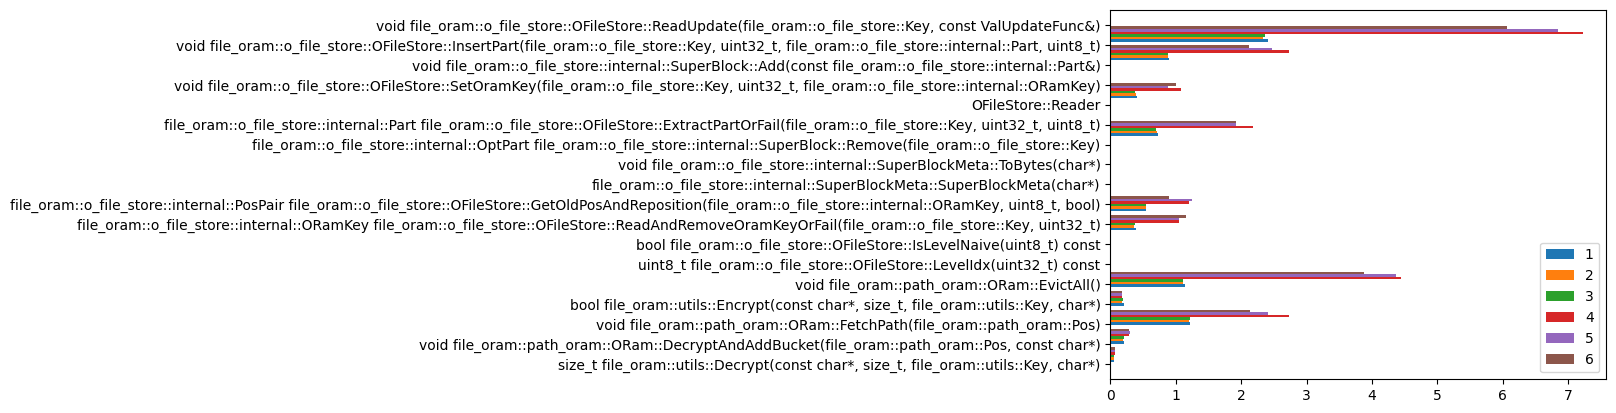

In [ ]:
bins = sorted(list(set(all_data['test'])))
log = False
fig, ax = plt.subplots()
ax.hist(xs, weights=ws, bins=len(bins),
        orientation='horizontal', log=log, label=labels)
plt.legend()
plt.show()


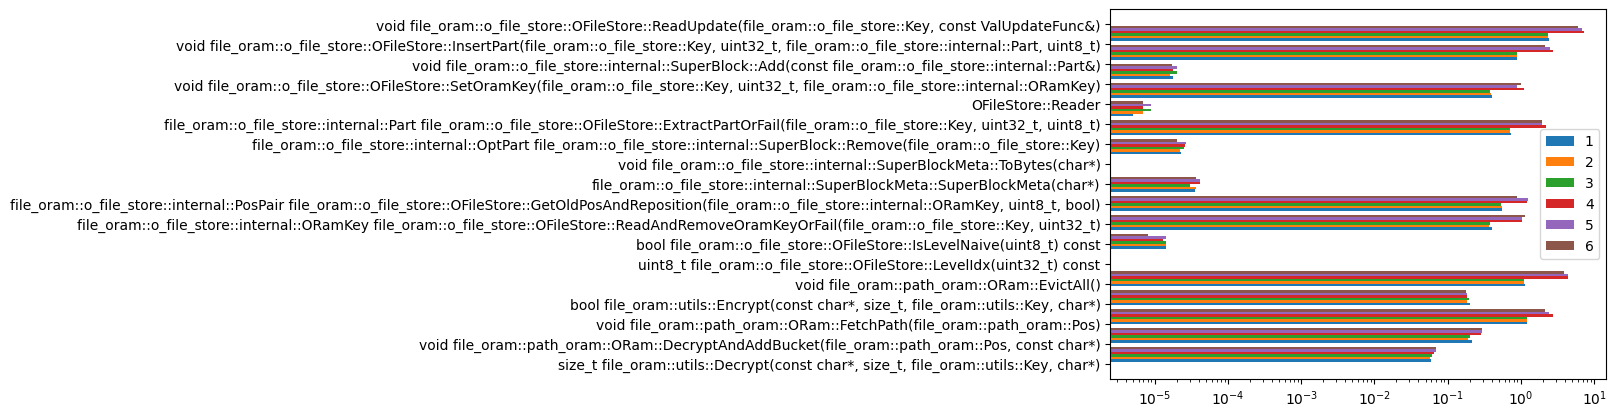

In [ ]:
bins = sorted(list(set(all_data['test'])))
log = True
fig, ax = plt.subplots()
ax.hist(xs, weights=ws, bins=len(bins),
        orientation='horizontal', log=log, label=labels)
plt.legend()
plt.show()


In [29]:
res = {}
for test in tqdm(sorted(list(set(all_data['test'])))):
    tdata = filterr(all_data, 'test', test)
    sums = []
    for id in ids:
        itdata = filterr(tdata, 'id', id)
        time_spent = itdata['time'].sum()
        sums.append(time_spent)
    minv, maxv = min(sums), max(sums)
    res[test] = (maxv - minv, sums)

diffs = res


100%|██████████| 18/18 [00:00<00:00, 33.27it/s]


OFileStore::Reader 4.000000000000001e-06


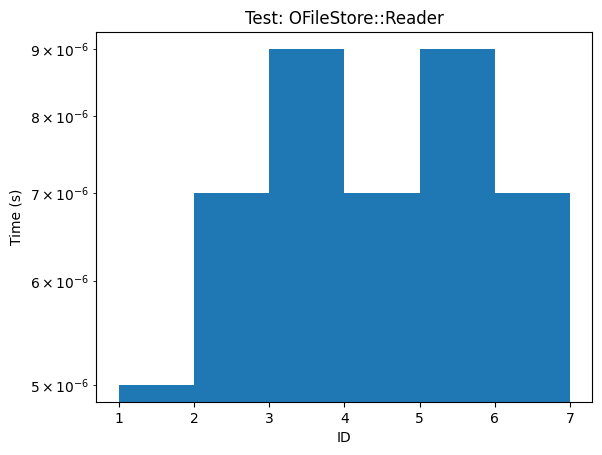

bool file_oram::o_file_store::OFileStore::IsLevelNaive(uint8_t) const 6.000000000000002e-06


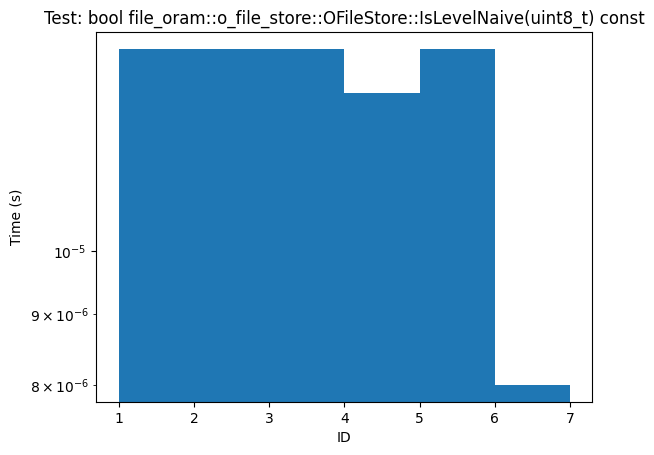

bool file_oram::utils::Encrypt(const char*, size_t, file_oram::utils::Key, char*) 0.02390600000000001


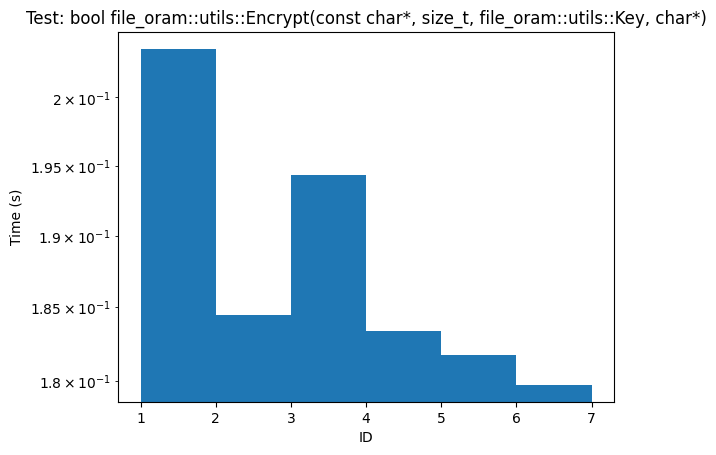

file_oram::o_file_store::internal::ORamKey file_oram::o_file_store::OFileStore::ReadAndRemoveOramKeyOrFail(file_oram::o_file_store::Key, uint32_t) 0.790215


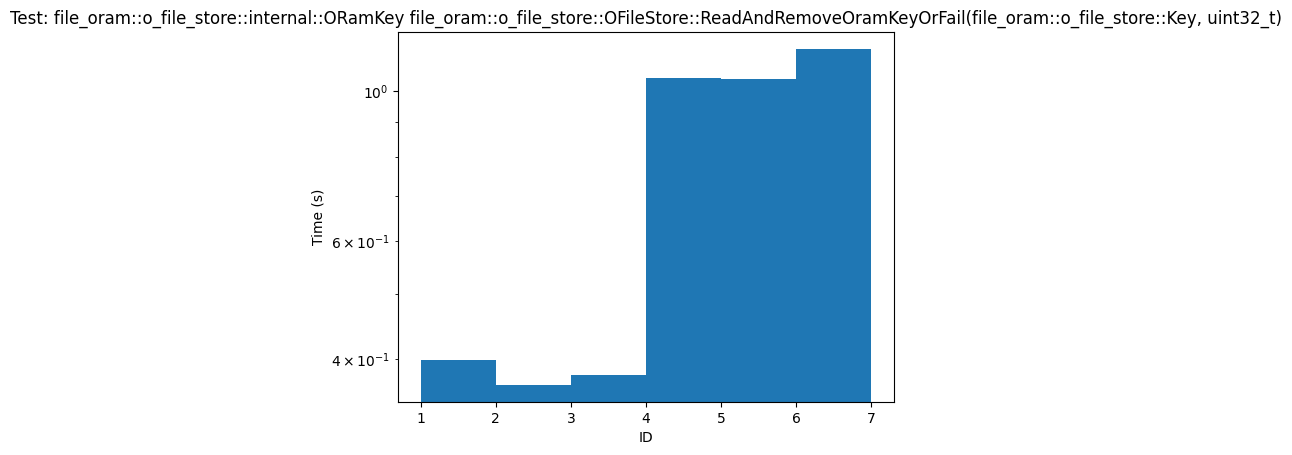

file_oram::o_file_store::internal::OptPart file_oram::o_file_store::internal::SuperBlock::Remove(file_oram::o_file_store::Key) 7.000000000000001e-06


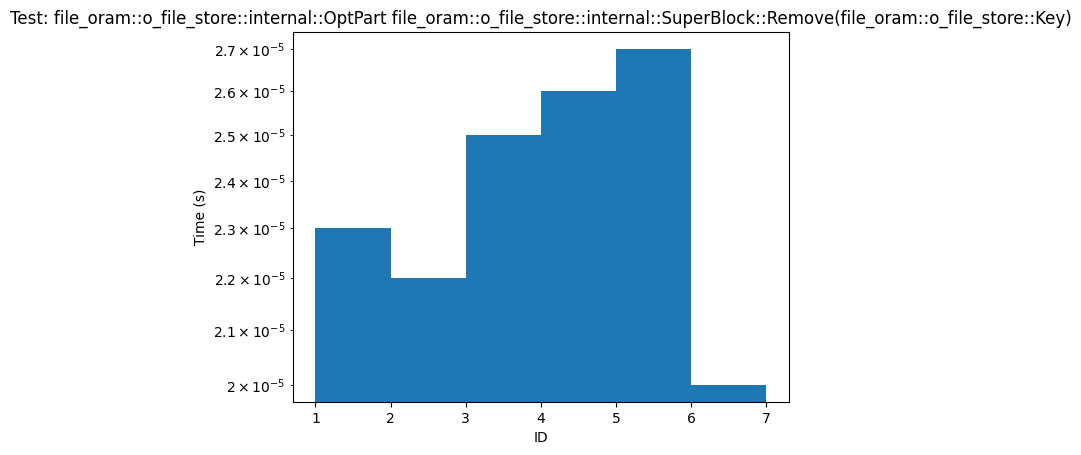

file_oram::o_file_store::internal::Part file_oram::o_file_store::OFileStore::ExtractPartOrFail(file_oram::o_file_store::Key, uint32_t, uint8_t) 1.4761159999999998


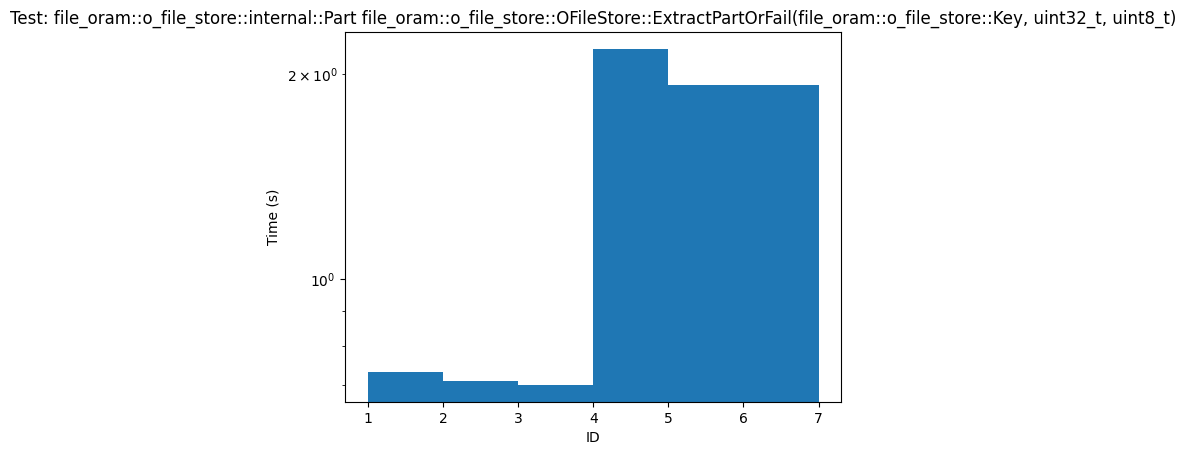

file_oram::o_file_store::internal::PosPair file_oram::o_file_store::OFileStore::GetOldPosAndReposition(file_oram::o_file_store::internal::ORamKey, uint8_t, bool) 0.7142400000000001


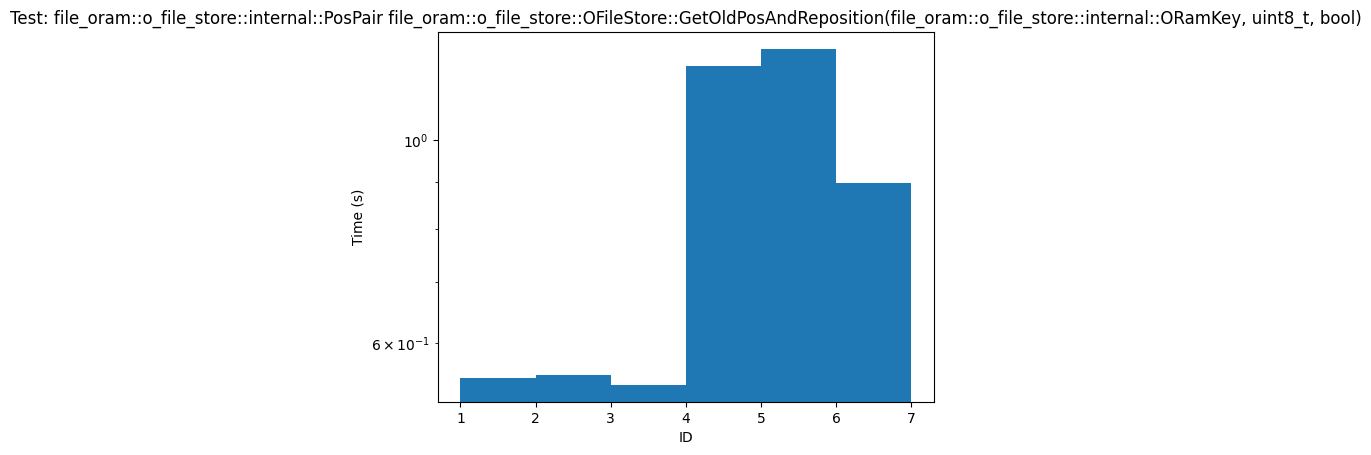

file_oram::o_file_store::internal::SuperBlockMeta::SuperBlockMeta(char*) 1.1999999999999994e-05


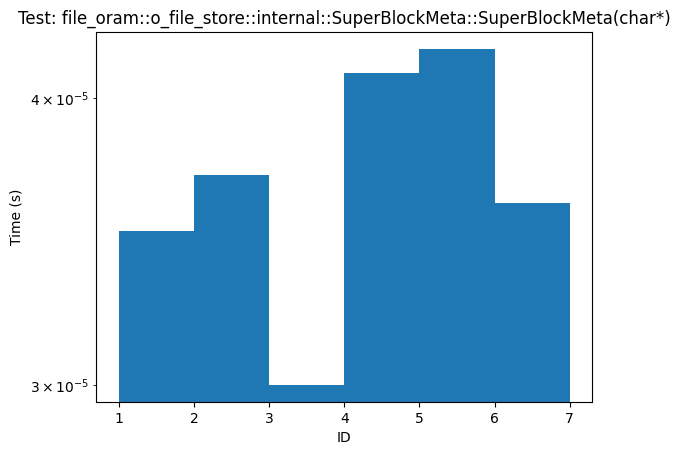

size_t file_oram::utils::Decrypt(const char*, size_t, file_oram::utils::Key, char*) 0.01164699999999999


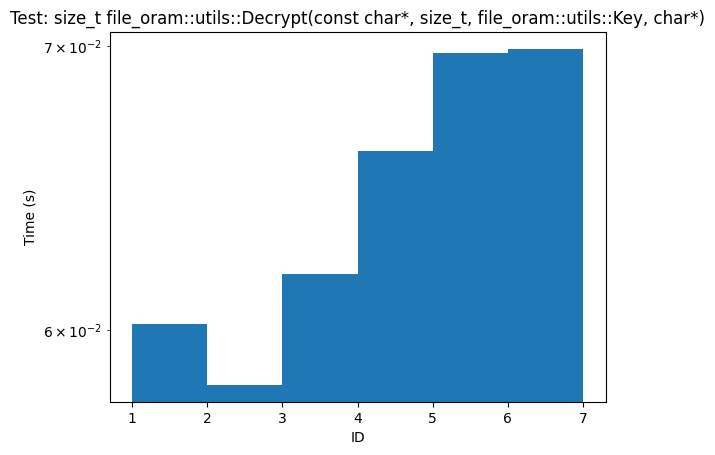

uint8_t file_oram::o_file_store::OFileStore::LevelIdx(uint32_t) const 0.0


/Users/amin/.pyenv/versions/3.11.1/envs/playground/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


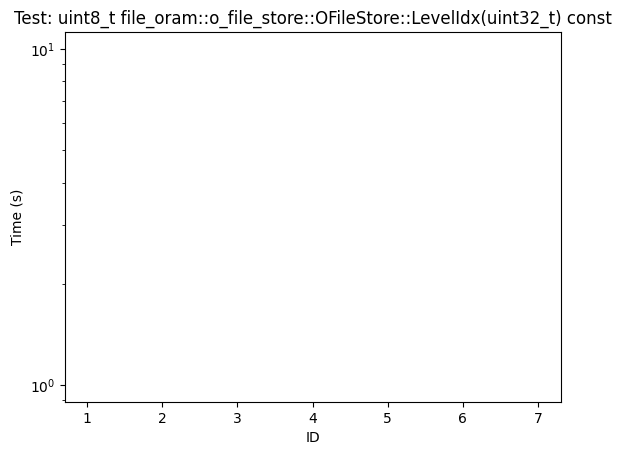

void file_oram::o_file_store::OFileStore::InsertPart(file_oram::o_file_store::Key, uint32_t, file_oram::o_file_store::internal::Part, uint8_t) 1.851738


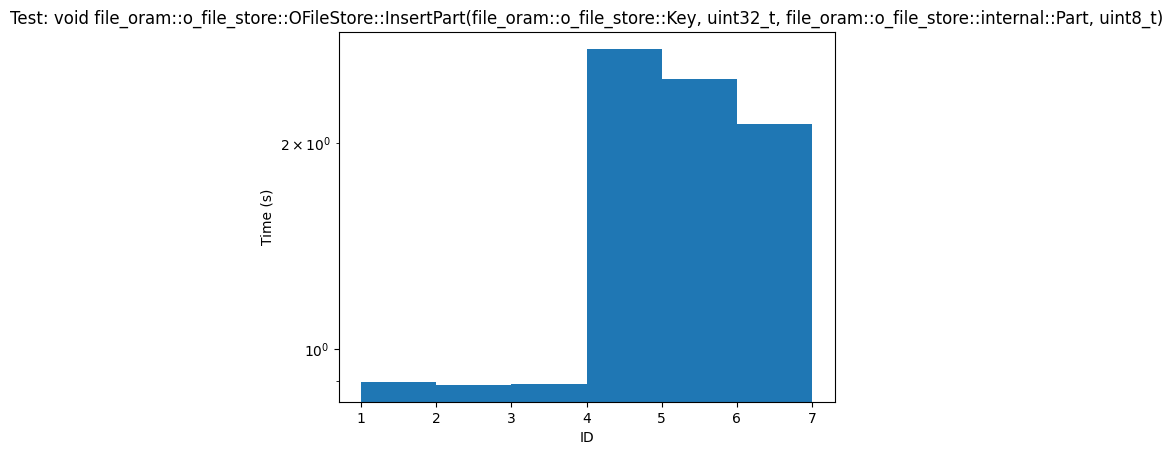

void file_oram::o_file_store::OFileStore::ReadUpdate(file_oram::o_file_store::Key, const ValUpdateFunc&) 4.8774560000000005


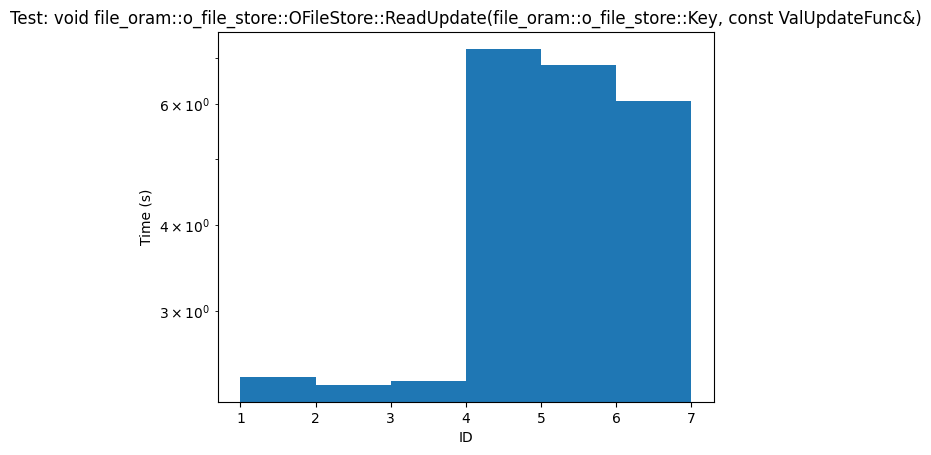

void file_oram::o_file_store::OFileStore::SetOramKey(file_oram::o_file_store::Key, uint32_t, file_oram::o_file_store::internal::ORamKey) 0.708778


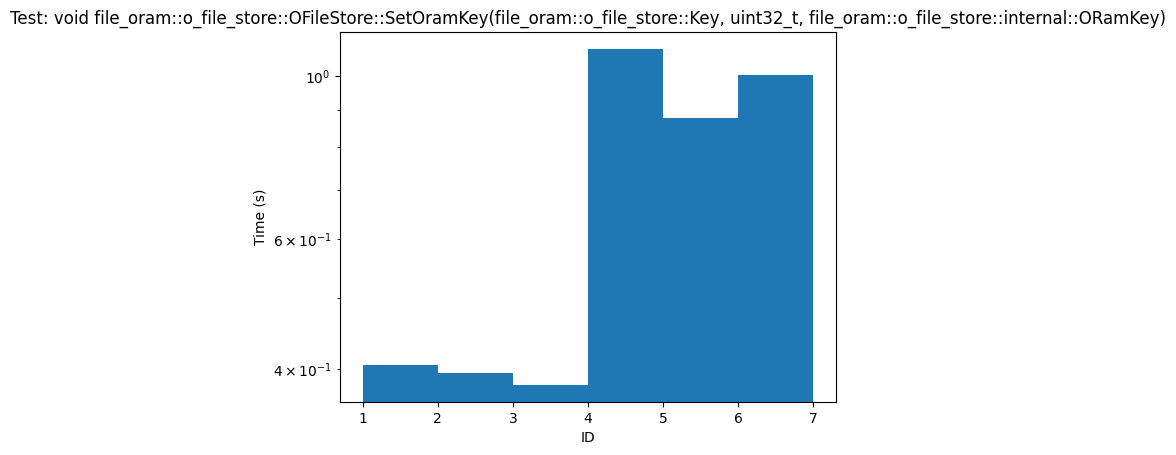

void file_oram::o_file_store::internal::SuperBlock::Add(const file_oram::o_file_store::internal::Part&) 4.000000000000002e-06


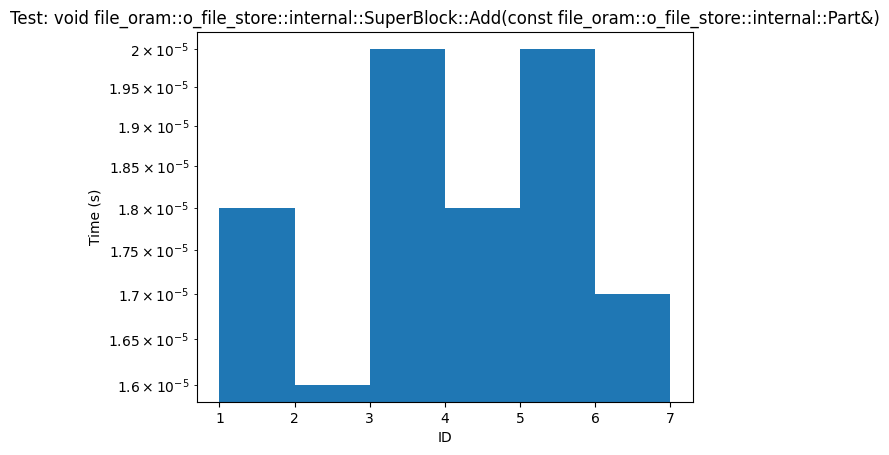

void file_oram::o_file_store::internal::SuperBlockMeta::ToBytes(char*) 0.0


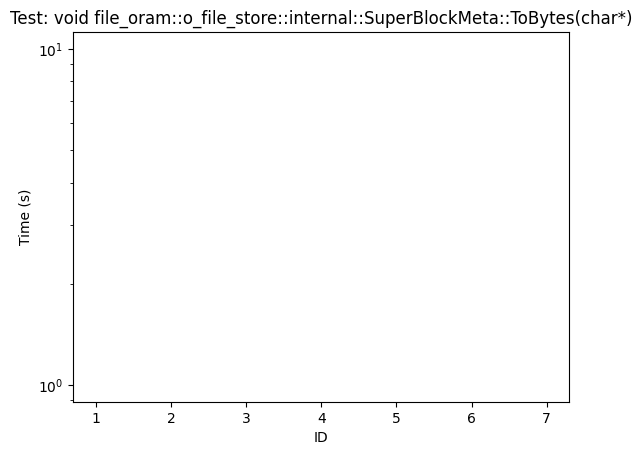

void file_oram::path_oram::ORam::DecryptAndAddBucket(file_oram::path_oram::Pos, const char*) 0.10443900000000003


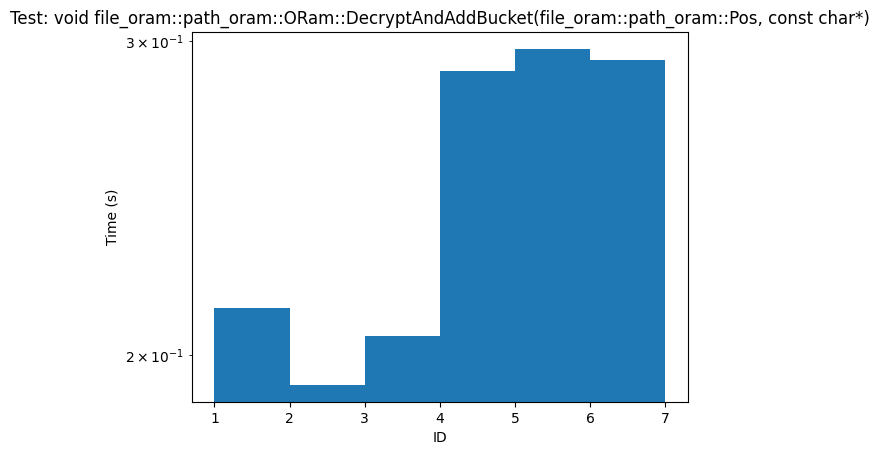

void file_oram::path_oram::ORam::EvictAll() 3.335514999999999


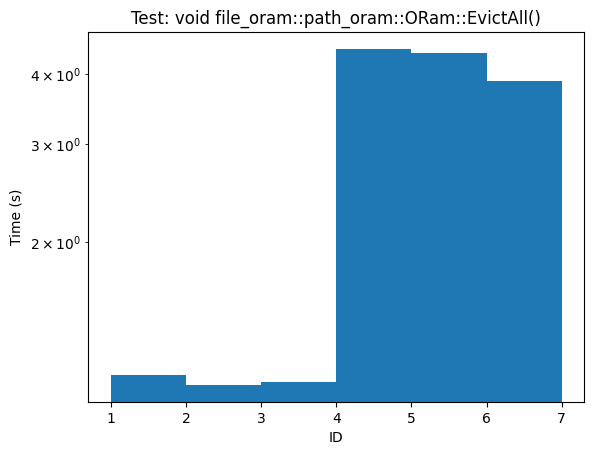

void file_oram::path_oram::ORam::FetchPath(file_oram::path_oram::Pos) 1.5292139999999999


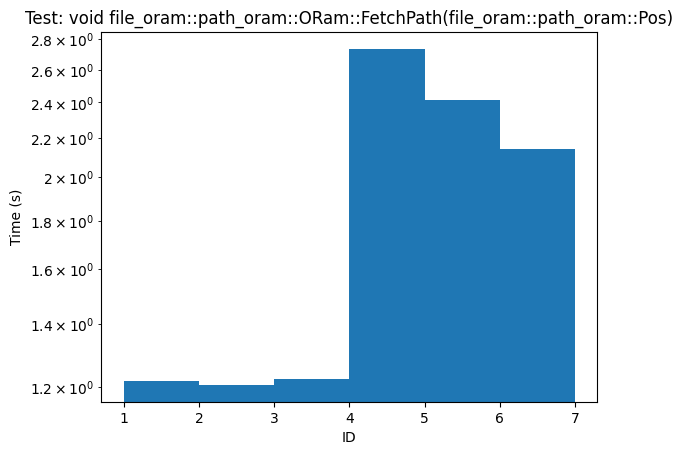

In [40]:
threshold = 0
log = True
for test in diffs:
    diff, sums = diffs[test]
    if diff >= threshold:
        fig, ax = plt.subplots()
        ax.hist(ids, weights=sums, log=log,
                bins=list(range(1, num_profiles+2)))
        plt.title(f'Test: {test}')
        ax.set_xlabel("ID")
        ax.set_ylabel("Time (s)")
        print(test, diff)
        plt.show()
